In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn import preprocessing, model_selection
import matplotlib as plt
from PIL import Image
import mtcnn
from mtcnn import MTCNN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def photos(img):
  '''
  The function approximates the face for a more correct classification.
  '''
  face_roi = face_det.detect_faces(img)
  try:
    x1, y1, width, height = face_roi[0]['box']
    x2, y2 = x1 + width, y1 + height
    face = img[y1:y2, x1:x2]
    face = Image.fromarray(face)
  except IndexError:
    k = []
    k.append(None)
    k = np.array(k)
    return k

  face1 = face.resize((200, 200),  Image.ANTIALIAS)

  return np.asarray(face1)


In [ ]:
X = []
Y = []

face_det = mtcnn.MTCNN()

#Хиддлстон
for i in range(1, 200):

  if i == 114 or i == 151:
    continue
  try:
    a = plt.image.imread(f'/content/drive/MyDrive/Практика3/Хиддлстон/Hiddleston{i}.jpg')
    #a1 = a.resize((200, 200),  Image.ANTIALIAS)
  except IOError:
    a = plt.image.imread(f'/content/drive/MyDrive/Практика3/Хиддлстон/Hiddleston{i}.jpeg')
    #a1 = a.resize((200, 200),  Image.ANTIALIAS)

  
  photo = photos(a)

  if photo.any() != None:
    X.append(photo)
    Y.append(np.array([1, 0, 0]))
  else:
    continue


#Холланд
for i in range(1, 200):

  if i == 23 or i == 107:
    continue
  try:
    a = plt.image.imread(f'/content/drive/MyDrive/Практика3/Холланд/holland{i}.jpg')
    #a1 = a.resize((200, 200),  Image.ANTIALIAS)
  except IOError:
    a = plt.image.imread(f'/content/drive/MyDrive/Практика3/Холланд/holland{i}.jpeg')
    #a1 = a.resize((200, 200),  Image.ANTIALIAS)
  
  
  photo = photos(a)

  if photo.any() != None:
    X.append(photo)
    Y.append(np.array([0, 1, 0]))
  else:
    continue

#Другие люди
for i in range(1, 320):
  try:
    a = plt.image.imread(f'/content/drive/MyDrive/Практика3/Люди/people{i}.jpeg')
    #a1 = a.resize((200, 200),  Image.ANTIALIAS)
  except IOError:
    continue

  photo = photos(a)

  if photo.any() != None:
    X.append(photo)
    Y.append(np.array([0, 0, 1]))
  else:
    continue

# Без людей
for i in range(1, 141):
  try:
    a = Image.open(f'/content/drive/MyDrive/Практика3/Люди/smth{i}.jpeg')
    a1 = a.resize((200, 200),  Image.ANTIALIAS)
  except IOError:
    continue

  X.append(np.asarray(a1))
  Y.append(np.array([0, 0, 1]))
# На первом месте - Хиддлстон, Втором - Холланд, третьем - остальные



  

Выходные данные были обрезаны до нескольких последних строк (5000).
1/1 [==============================] - 0s 21ms/step


In [ ]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(805, 200, 200, 3)
(805, 3)


In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size = 0.7)

In [ ]:
del X
del Y

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(563, 200, 200, 3)
(242, 200, 200, 3)
(563, 3)
(242, 3)


In [ ]:
# Нормализация
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = keras.Sequential([
    #CNN. 1
    tf.keras.layers.Conv2D(16, (5, 5), padding = 'same', activation = 'relu', input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    #2
    tf.keras.layers.Conv2D(32, (5, 5), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    #3
    tf.keras.layers.Conv2D(64, (4, 4), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    #4
    tf.keras.layers.Conv2D(128, (4, 4), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    #FC
    #tf.keras.layers.Dense(1000, activation = 'relu'),
    #tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(750, activation = 'relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(250, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.2)

Epoch 1/20
15/15 [==============================] - 1s 62ms/step - loss: 0.0475 - accuracy: 0.9867 - val_loss: 0.8695 - val_accuracy: 0.8230
Epoch 2/20
15/15 [==============================] - 1s 50ms/step - loss: 0.0336 - accuracy: 0.9889 - val_loss: 0.8151 - val_accuracy: 0.8230
Epoch 3/20
15/15 [==============================] - 1s 49ms/step - loss: 0.0225 - accuracy: 0.9956 - val_loss: 0.8430 - val_accuracy: 0.8407
Epoch 4/20
15/15 [==============================] - 1s 50ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.8701 - val_accuracy: 0.8319
Epoch 5/20
15/15 [==============================] - 1s 50ms/step - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.7749 - val_accuracy: 0.8407
Epoch 6/20
15/15 [==============================] - 1s 50ms/step - loss: 0.0199 - accuracy: 0.9978 - val_loss: 0.9593 - val_accuracy: 0.8230
Epoch 7/20
15/15 [==============================] - 1s 49ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.8036 - val_accuracy: 0.8319
Epoch 8/20
15

In [ ]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 19ms/step - loss: 0.7132 - accuracy: 0.8760


[0.7131590843200684, 0.8760330677032471]

In [ ]:
model.save('/content/drive/MyDrive/')

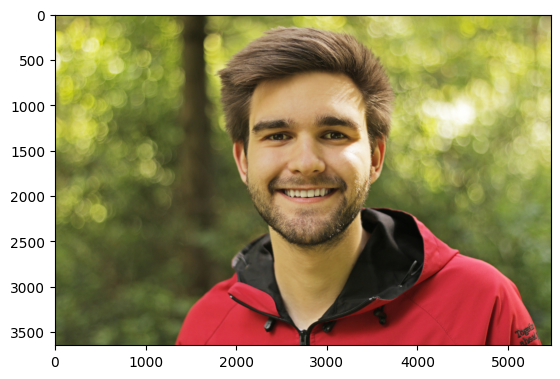

In [ ]:
hol = plt.image.imread('/content/drive/MyDrive/ph.jpg')

plt.pyplot.imshow(hol)

In [ ]:
ph = photos(hol)

1/1 [==============================] - 0s 35ms/step


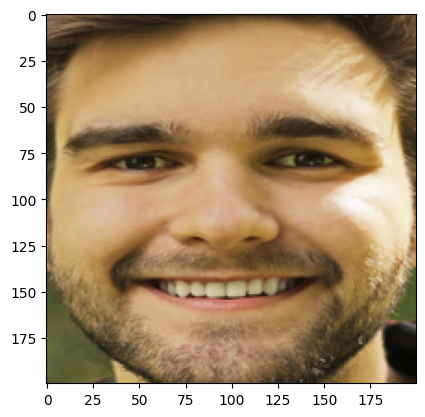

In [ ]:
plt.pyplot.imshow(ph)

In [ ]:
ph = ph.reshape(-1, 200, 200, 3)

In [ ]:
golittlerockstar = model.predict(ph)

1/1 [==============================] - 0s 59ms/step


In [ ]:
golittlerockstar


array([[0., 0., 1.]], dtype=float32)

10/10 [==============================] - 0s 20ms/step


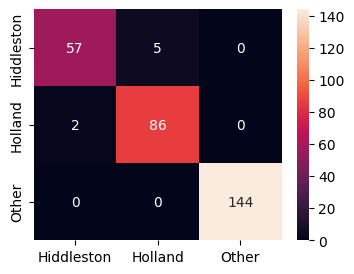

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fruit_names1 = ["Hiddleston", "Holland", "Other" ]

pred_test = model.predict(x_test)
pred_classes_test = np.argmax(pred_test, axis = 1)
true_test = np.argmax(y_test, axis = 1)
conf_matr_test = confusion_matrix(true_test, pred_classes_test)
f, ax = plt.subplots(figsize = (4, 3))
sns.heatmap(conf_matr_test, annot = True, fmt = ".0f")
ax.set_xticklabels(fruit_names1)
ax.set_yticklabels(fruit_names1)
plt.show()

In [ ]:
face_det = mtcnn.MTCNN()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/ModelForTomClassification')

1/1 [==============================] - 0s 18ms/step


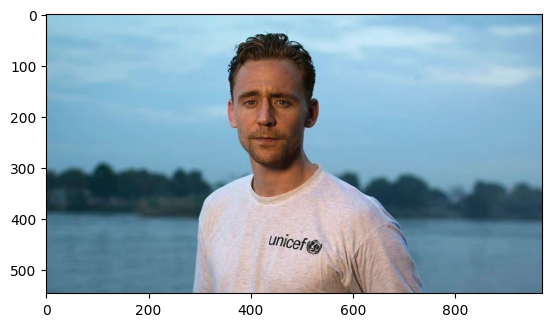

In [ ]:
ph = plt.image.imread('/content/drive/MyDrive/Практика3/Хиддлстон/Hiddleston226.jpeg')

plt.pyplot.imshow(ph)

ph = photos(ph)

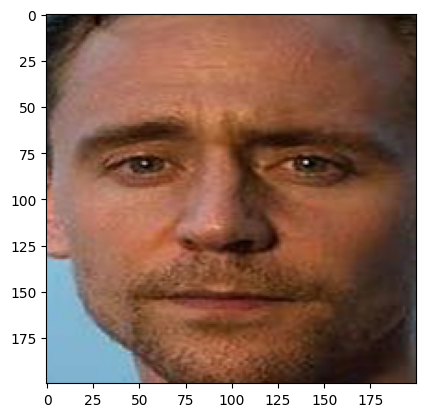

In [ ]:
plt.pyplot.imshow(ph)

In [ ]:
ph = ph.reshape(-1, 200, 200, 3)

In [ ]:
go = model.predict(ph)

1/1 [==============================] - 0s 22ms/step


In [ ]:
ph.shape

(1, 200, 200, 3)

In [ ]:
go

array([[1., 0., 0.]], dtype=float32)